In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
tempelhof=pd.read_csv('TG_STAID002759.txt', skiprows=20, names=['SOUID', 'DATE', 'temp', 'Q_TG'], 
                 dtype={'SOUID':'int64', 'temp':'int64','Q_TG':'int64'})
tempelhof=tempelhof.set_index(pd.to_datetime(tempelhof.DATE, format='%Y%m%d', errors='ignore')).drop('DATE', axis=1)
tempelhof=tempelhof['2010':].drop('Q_TG', axis=1)
tempelhof['month_name']=tempelhof.index.month_name()
tempelhof['month']=tempelhof.index.month
tempelhof['year']=tempelhof.index.year
tempelhof['temp']=tempelhof['temp']/10

In [25]:
tempelhof.head()

,SOUID,temp,month_name,month,year
DATE,,,,,
2010-01-01,111448,-1.4,January,1,2010
2010-01-02,111448,-1.7,January,1,2010
2010-01-03,111448,-4.3,January,1,2010
2010-01-04,111448,-5.6,January,1,2010
2010-01-05,111448,-6.0,January,1,2010


### Stationarize Data

In [26]:
tempelhof['diff']=tempelhof['temp'].diff()

In [27]:
tempelhof['monthly_mean']=tempelhof.groupby('month')['diff'].transform('mean')
tempelhof['deseason']=tempelhof['diff']-tempelhof['monthly_mean']

In [28]:
tempelhof.fillna(method='bfill', inplace=True)

In [29]:
tempelhof.head()

,SOUID,temp,month_name,month,year,diff,monthly_mean,deseason
DATE,,,,,,,,
2010-01-01,111448,-1.4,January,1,2010,-0.3,-0.081471,-0.218529
2010-01-02,111448,-1.7,January,1,2010,-0.3,-0.081471,-0.218529
2010-01-03,111448,-4.3,January,1,2010,-2.6,-0.081471,-2.518529
2010-01-04,111448,-5.6,January,1,2010,-1.3,-0.081471,-1.218529
2010-01-05,111448,-6.0,January,1,2010,-0.4,-0.081471,-0.318529


### Train-Test Split

In [30]:
xtrain=tempelhof[:'2019-04-29'].index
xtest=tempelhof['2019-04-30':].index
ytrain=tempelhof['deseason'][:'2019-04-29']
ytest=tempelhof['deseason']['2019-04-30':]

### Naive Forecasting

In [31]:
# forecast last seen value
ypred_last=np.full((len(xtest),1),ytrain[-1:])

In [32]:
# forecast mean 
ypred_mean=[ytrain.mean()]*len(xtest)

In [33]:
# forecast the seasonal mean 
ypred_sm=[]
for i, j in enumerate(xtest):
    month=i%12
    this_month=ytrain[month::12]
    month_mean=this_month.mean()
    ypred_sm.append(month_mean)   

In [35]:
ypred_sm[:10]

[-0.06943950946613145,
 -0.005327249887152292,
 0.32791910608260166,
 -0.07087923383384317,
 -0.045090349993164615,
 0.1886074010290979,
 -0.13595386832297182,
 -0.1354690439318546,
 -0.09468143847622407,
 -0.10181790092234187]

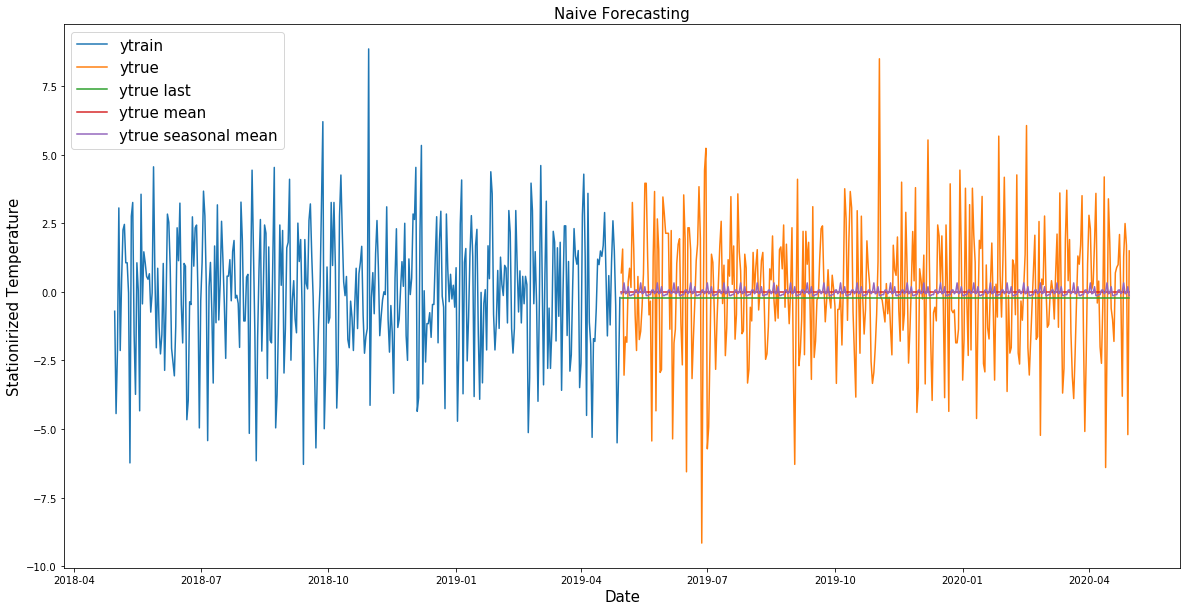

In [36]:
plt.figure(figsize=(20,10))
plt.plot(xtrain[-365:], ytrain[-365:], label='ytrain')
plt.plot(xtest, ytest, label='ytrue')
plt.plot(xtest, ypred_last, label='ytrue last')
plt.plot(xtest, ypred_mean, label='ytrue mean')
plt.plot(xtest, ypred_sm, label='ytrue seasonal mean')
plt.title('Naive Forecasting', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Stationirized Temperature', fontsize=15)
plt.legend(fontsize=15)
plt.savefig('naive_forecast.png')